# Uber Supply-Demand Gap - Assignment

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imported the libraries to be used in the Assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Started with the "Data Cleansing" & "Derived Metrics" activity

### Summarising the activities carried out in "Data Cleansing" & "Derived Metrics":
1. Converted the date formats to uniquely read in the format as 'YYYY-MM-DD HH:MM:SS'
2. Rounded Off the timestamp to Hour and extracted that separately 
3. Added a new columns 'TravelFrom-To' defining the journey was Airport to City or vice versa for good readeability &     
   'StateOfRequest' to see if Journey was completed or failed 

In [3]:
# Read the file 'Uber Request Data' for analysis  
UberData = pd.read_csv('Uber Request Data.csv')
UberData

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# Checked the datatype for the incoming data to understand the data well and also the count of rows for each attribute
UberData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
# Converted the timestamp columns to 'datetime' datatype
UberData['Request timestamp'] = pd.to_datetime(UberData['Request timestamp'],dayfirst=True)
UberData['Drop timestamp'] = pd.to_datetime(UberData['Drop timestamp'],dayfirst=True)

In [6]:
# Extracted the Date from Datetime stamp which will be used further for analysis
UberData['RequestDate'] = UberData['Request timestamp'].dt.date

In [7]:
# Extracted the Hour from Datetime stamp which will be used further for analysis
UberData['RoundHourReq'] = UberData['Request timestamp'].dt.hour

In [8]:
# Adding a new column for good readeability of data and understanding
UberData['TravelFrom-To'] = UberData['Pickup point'].apply(lambda x: 'Airport to City' if x=='Airport' else 'City to Airport')

In [9]:
# Adding a new column for request status if completed or failed
UberData['StateOfRequest'] = UberData['Status'].apply(lambda x: 'Completed' if x=='Trip Completed' else 'Failed')

In [10]:
# Creating time slots as; 
#          1. Morning (5 AM to 11 AM)
#          2. Afternoon (11 AM to 5 PM)
#          3. Evening (5 PM to 11 PM)
#          4. Night (11PM to 5 AM)
T1 = [5,6,7,8,9,10]
T2 = [11,12,13,14,15,16]
T3 = [17,18,19,20,21,22]
UberData['Time-Slots'] = np.where(UberData['RoundHourReq'].isin(T1),'Morning (5 AM to 11 AM)',
                                 np.where(UberData['RoundHourReq'].isin(T2),'Afternoon (11 AM to 5 PM)',
                                         np.where(UberData['RoundHourReq'].isin(T3),'Evening (5 PM to 11 PM)','Night (11PM to 5 AM)')))

In [11]:
#Check if times data is correctely extracted from the raw date column and since 'Request id' is unique identifier, made it as my index column
UberData.set_index('Request id')

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestDate,RoundHourReq,TravelFrom-To,StateOfRequest,Time-Slots
Request id,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Airport to City,Completed,Afternoon (11 AM to 5 PM)
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Airport to City,Completed,Evening (5 PM to 11 PM)
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,City to Airport,Completed,Morning (5 AM to 11 AM)
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Airport to City,Completed,Evening (5 PM to 11 PM)
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,City to Airport,Completed,Morning (5 AM to 11 AM)
3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21,Airport to City,Completed,Evening (5 PM to 11 PM)
4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,6,Airport to City,Completed,Morning (5 AM to 11 AM)
5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,5,Airport to City,Completed,Morning (5 AM to 11 AM)
6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17,City to Airport,Completed,Evening (5 PM to 11 PM)


In [12]:
# checked the final count of rows and columns 
print(UberData.shape)

(6745, 11)


In [13]:
# checked the final UberData dataset
print(UberData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
RequestDate          6745 non-null object
RoundHourReq         6745 non-null int64
TravelFrom-To        6745 non-null object
StateOfRequest       6745 non-null object
Time-Slots           6745 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 579.7+ KB
None


In [14]:
# Checked the statistical data
UberData.describe()

,Request id,Driver id,RoundHourReq
count,6745.000000,4095.000000,6745.000000
mean,3384.644922,149.501343,12.956709
std,1955.099667,86.051994,6.504052
min,1.000000,1.000000,0.000000
25%,1691.000000,75.000000,7.000000
50%,3387.000000,149.000000,13.000000
75%,5080.000000,224.000000,19.000000
max,6766.000000,300.000000,23.000000


## Started "Univariate Analysis" & "Bivariate Analysis" on the data to do Supply-Demand-Gap Analysis 

In [15]:
# UberProdData dataframe is for 'Cancelled' and 'No Cars Available'. 
UberProbData = UberData.loc[UberData['Status']!='Trip Completed']
UberProbData.set_index('Request id')

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestDate,RoundHourReq,TravelFrom-To,StateOfRequest,Time-Slots
Request id,,,,,,,,,,
2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,6,City to Airport,Failed,Morning (5 AM to 11 AM)
4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17,City to Airport,Failed,Evening (5 PM to 11 PM)
5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20,Airport to City,Failed,Evening (5 PM to 11 PM)
5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10,City to Airport,Failed,Morning (5 AM to 11 AM)
2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19,Airport to City,Failed,Evening (5 PM to 11 PM)
3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT,2016-07-13,20,Airport to City,Failed,Evening (5 PM to 11 PM)
4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,2016-07-14,8,City to Airport,Failed,Morning (5 AM to 11 AM)
5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT,2016-07-14,19,Airport to City,Failed,Evening (5 PM to 11 PM)
80,City,3.0,Cancelled,2016-07-11 04:47:00,NaT,2016-07-11,4,City to Airport,Failed,Night (11PM to 5 AM)


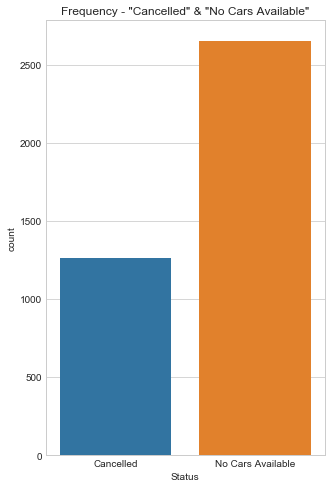

In [16]:
# created countplot in seaborn to see the count of each category by Status
sns.set_style("whitegrid")
plt.figure(figsize=(5, 8))
sns.countplot(x='Status',data=UberProbData)
plt.title('Frequency - "Cancelled" & "No Cars Available"')
plt.show()

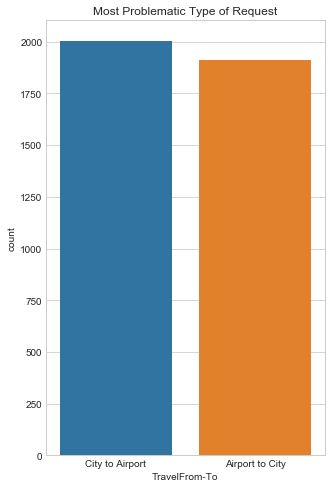

In [17]:
# Overall plot to see which trip is more problematic (Airport to City OR City to Airport)
plt.figure(figsize=(5, 8))
sns.countplot(x='TravelFrom-To',data=UberProbData)
plt.title('Most Problematic Type of Request')
plt.show()

In [18]:
# Drilling down more to see the data for problematic data on a trip (Airport to City OR City to Airport) across each Status. 
UberProbData.groupby(['Status','TravelFrom-To'])['TravelFrom-To'].size()

Status             TravelFrom-To  
Cancelled          Airport to City     198
                   City to Airport    1066
No Cars Available  Airport to City    1713
                   City to Airport     937
Name: TravelFrom-To, dtype: int64

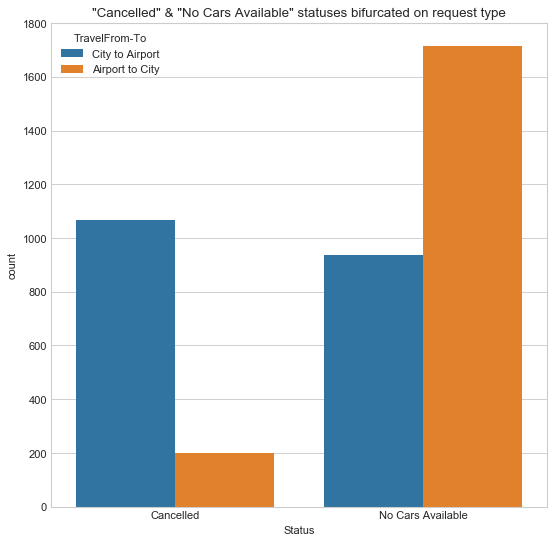

In [19]:
# Visualizing the same frequency of problematic data through plot with sub category as 'TravelFromTo'

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Status', hue="TravelFrom-To", data=UberProbData)
plt.title('"Cancelled" & "No Cars Available" statuses bifurcated on request type')
plt.show()

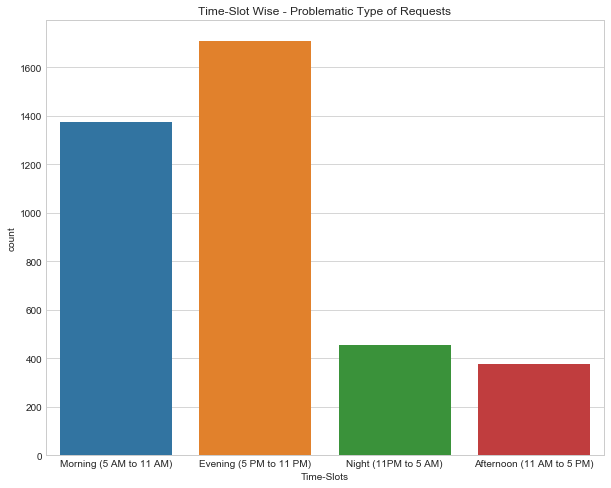

In [20]:
# time slot wise plot to see which timeslot has got more cancellation and no cars available problem
plt.figure(figsize=(10, 8))
sns.countplot(x="Time-Slots", data=UberProbData)
plt.title('Time-Slot Wise - Problematic Type of Requests')
plt.show()

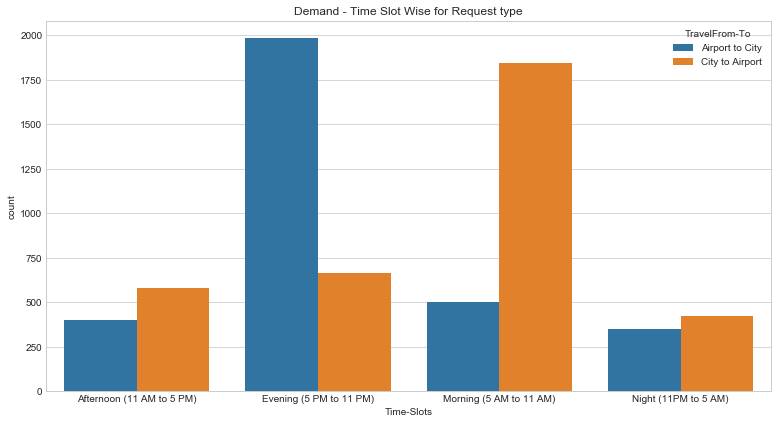

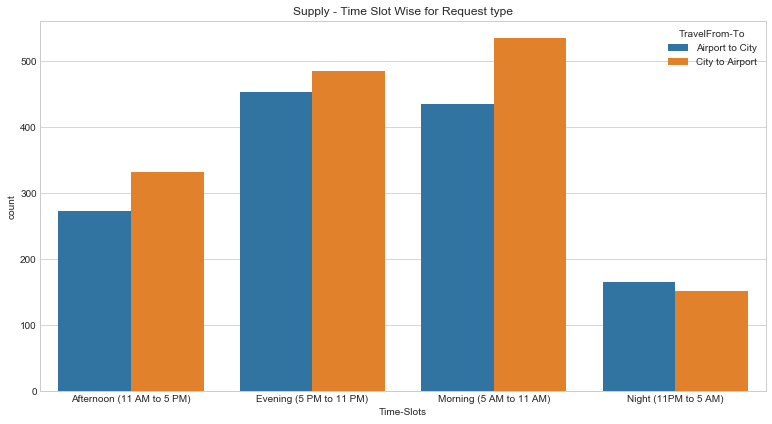

In [21]:
# 'Hour' wise plot with the travel journey from Airport to City and City to Airport defining the 'Time Slot wise Demand' and 'Time Slot wise Supply' 

# subplot 1
plt.figure(figsize=(13, 15))
plt.subplot(2, 1, 1)
sns.countplot(x='Time-Slots', hue="TravelFrom-To", data=UberData)
plt.title('Demand - Time Slot Wise for Request type')
plt.show()

# subplot 2
df1 = UberData.loc[UberData['StateOfRequest']=='Completed']
df1['RoundHourCompleted'] = df1['RoundHourReq']
plt.figure(figsize=(13, 15))
plt.subplot(2, 1, 2)
sns.countplot(x='Time-Slots', hue="TravelFrom-To", data=df1)
plt.title('Supply - Time Slot Wise for Request type')
plt.show()

In [22]:
Demand = UberData.groupby('RoundHourReq')['RoundHourReq'].count()
Supply = df1.groupby('RoundHourCompleted')['RoundHourCompleted'].count()
df2 = pd.concat([Demand,Supply],axis=1)
df2['Gap (Demand-Supply)'] = df2['RoundHourReq']-df2['RoundHourCompleted']
df2

,RoundHourReq,RoundHourCompleted,Gap (Demand-Supply)
0,99,40,59
1,85,25,60
2,99,37,62
3,92,34,58
4,203,78,125
5,445,185,260
6,398,167,231
7,406,174,232
8,423,155,268
9,431,173,258


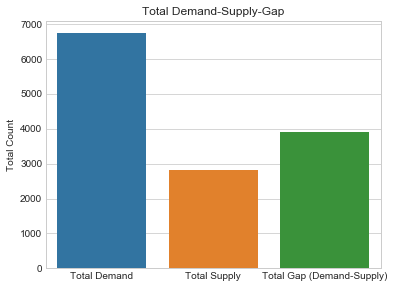

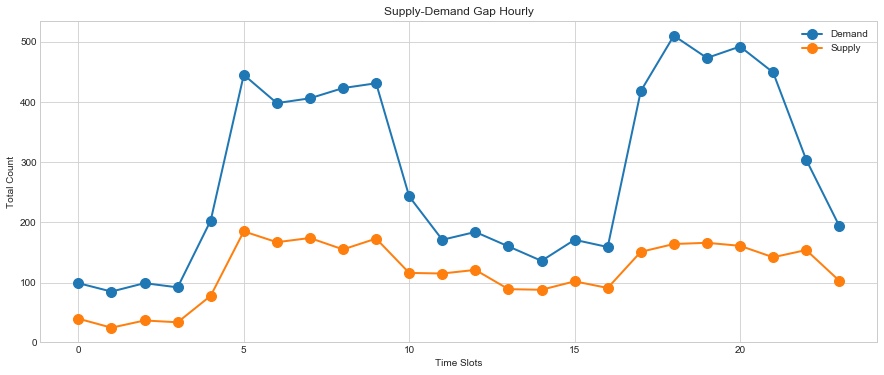

In [23]:
# to see the 'Total Demand' Vs 'Total Supply' Vs 'Total Gap'

df2['A'] = "A"
df5 = df2.groupby('A')['RoundHourReq','RoundHourCompleted','Gap (Demand-Supply)'].sum()
df5 = df5.rename(columns={'RoundHourReq':'Total Demand', 'RoundHourCompleted':'Total Supply', 'Gap (Demand-Supply)':'Total Gap (Demand-Supply)'})

#Subplot 01
plt.figure(figsize=(6,10))
plt.subplot(2, 1, 1)
plt.title('Total Demand-Supply-Gap')
plt.ylabel('Total Count')
sns.barplot(data=df5)


M = UberData.groupby('RoundHourReq')['RoundHourReq'].count()
N = df1.groupby('RoundHourCompleted')['RoundHourCompleted'].count()

#Subplot 02
plt.figure(figsize=(15,13))
plt.subplot(2, 1, 2)
plt.title('Supply-Demand Gap Hourly')
plt.xlabel('Time Slots')
plt.ylabel('Total Count')
plt.plot(M,linestyle='solid',marker='o',markersize=10,linewidth=2,label="Demand")
plt.plot(N,linestyle='solid',marker='o',markersize=10,linewidth=2,label="Supply")
plt.legend()

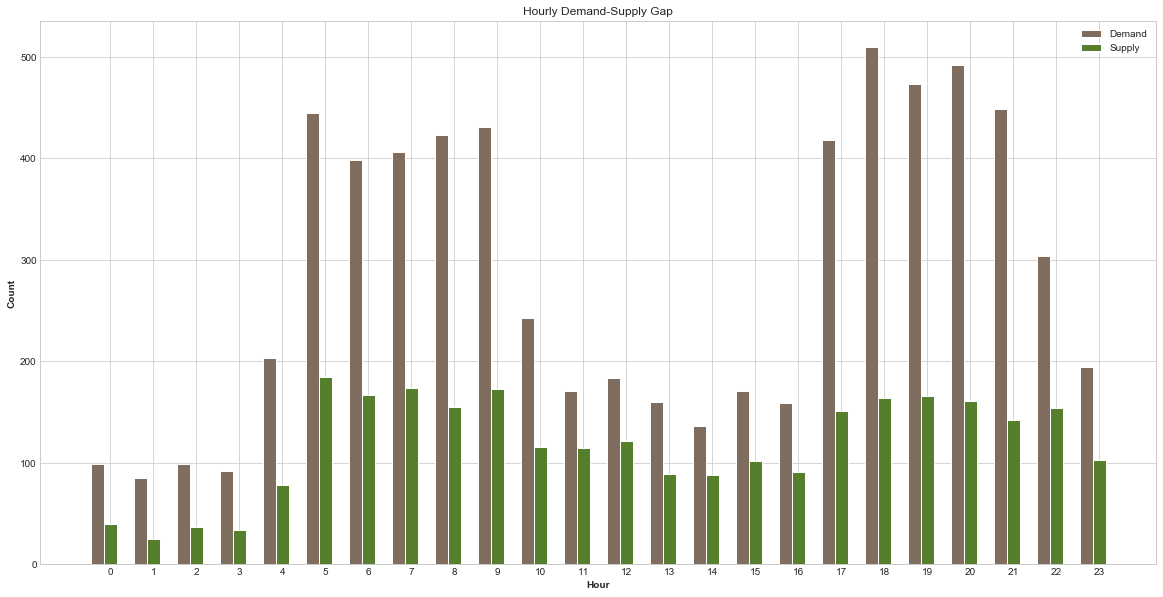

In [24]:
# Showed the time gap with the Demand and Supply plot. Brown being Demand and Green beng Supply, we can eaily see the difference at 18th bar is high, sugggesting the time as 5PM-6PM as peak time.
plt.figure(figsize=(20, 10))

# set width of bar
barWidth = 0.3

# set height of bar
bars1 = df2['RoundHourReq']
bars2 = df2['RoundHourCompleted']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Demand')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Supply')

# Add xticks on the middle of the group bars
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
 
# Create legend & Show graphic
plt.legend()
plt.title('Hourly Demand-Supply Gap')
plt.show()

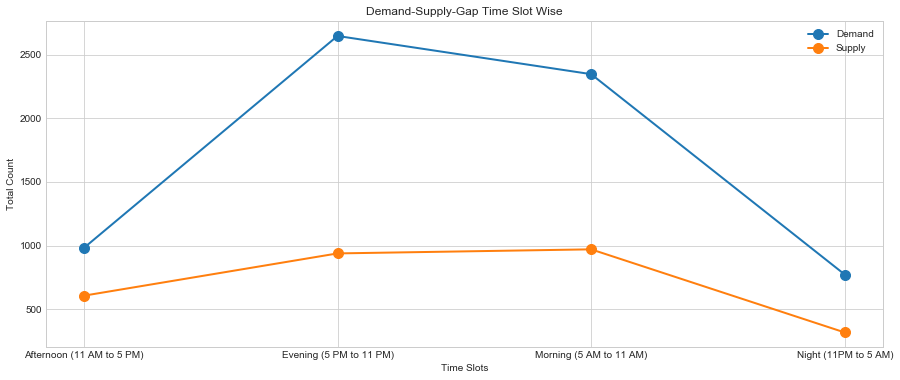

In [25]:
# Demand - Supply -Gap time slot wise on line chart for easy comparison

x = UberData.groupby('Time-Slots')['Time-Slots'].count()
y = df1.groupby('Time-Slots')['Time-Slots'].count()

plt.figure(figsize=(15,6))
plt.title('Demand-Supply-Gap Time Slot Wise')
plt.xlabel('Time Slots')
plt.ylabel('Total Count')
plt.plot(x,linestyle='solid',marker='o',markersize=10,linewidth=2,label="Demand")
plt.plot(y,linestyle='solid',marker='o',markersize=10,linewidth=2,label="Supply")
plt.legend()

### Identified 'Time Slots' where highest 'Demand-Supply' gap exist;
     1. Morning 5 AM to 11 AM
     2. Evening 5 PM to 11 PM

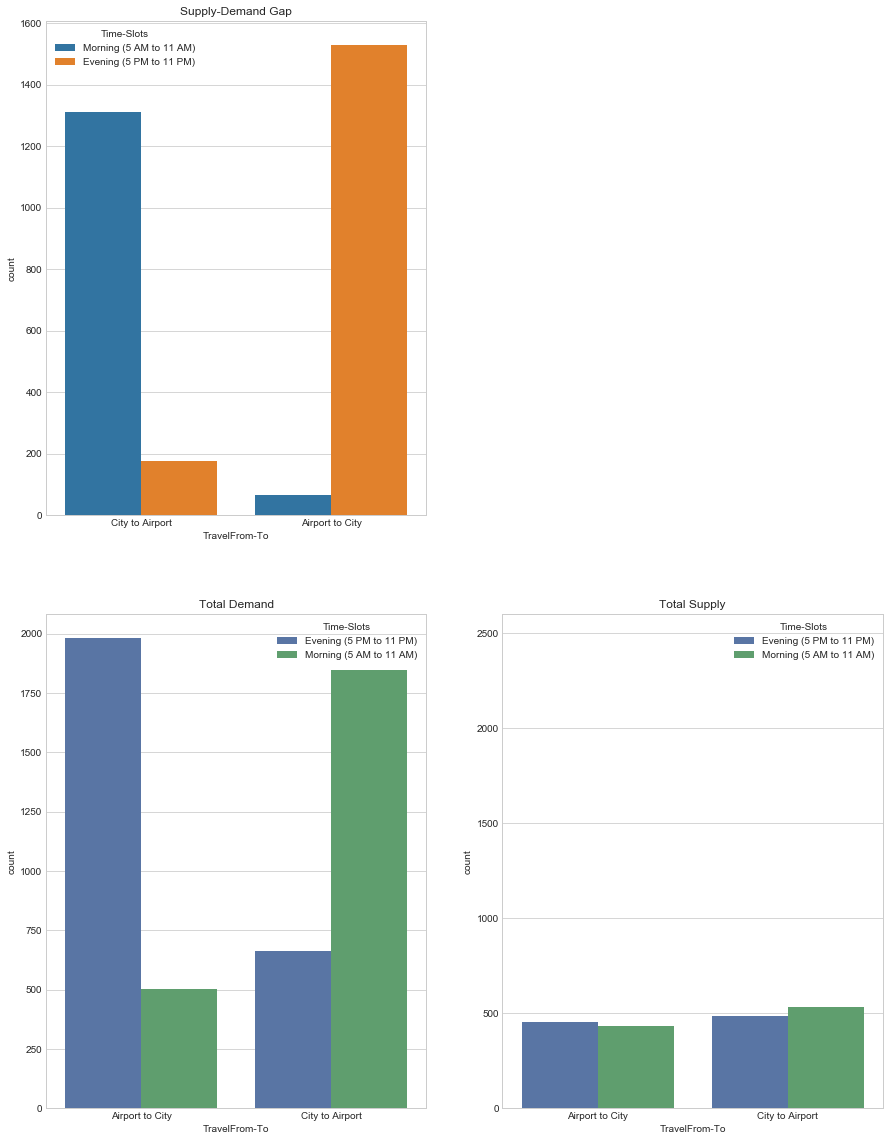

In [26]:
# "Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots"

T = ['Morning (5 AM to 11 AM)','Evening (5 PM to 11 PM)']
UberDataReqSelTimeSlot = UberData.loc[UberData['Time-Slots'].isin(T)]
df3 = df1.loc[df1['Time-Slots'].isin(T)]
df4 = UberDataReqSelTimeSlot.loc[UberDataReqSelTimeSlot['StateOfRequest']=='Failed']
df4 = df4.rename(columns={'RoundHourReq':'RoundHourIncomplete'})
df4 = df4.loc[df4['Time-Slots'].isin(T)]

plt.figure(figsize=(15,20))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('Supply-Demand Gap')
sns.countplot(x='TravelFrom-To', hue='Time-Slots', data=df4)

# subplot 2
plt.subplot(2, 2, 3)
plt.title('Total Demand')
sns.countplot(x='TravelFrom-To', hue='Time-Slots',data=UberDataReqSelTimeSlot,palette="deep")

# subplot 3
plt.subplot(2, 2, 4)
plt.title('Total Supply')
sns.countplot(x='TravelFrom-To', hue='Time-Slots', data=df3,palette="deep")
plt.ylim(0,2600)

plt.show()

In [27]:
# see the data for the above plots
M = UberDataReqSelTimeSlot.groupby(['TravelFrom-To','Time-Slots'])['RoundHourReq'].count()
N = df3.groupby(['TravelFrom-To','Time-Slots'])['RoundHourCompleted'].count()
O = df4.groupby(['TravelFrom-To','Time-Slots'])['RoundHourIncomplete'].count()
P = pd.concat([M,N,O],axis=1)
P

RoundHourReq  RoundHourCompleted  \
TravelFrom-To   Time-Slots                                                  
Airport to City Evening (5 PM to 11 PM)          1983                 453   
                Morning (5 AM to 11 AM)           501                 435   
City to Airport Evening (5 PM to 11 PM)           663                 485   
                Morning (5 AM to 11 AM)          1845                 535   

                                         RoundHourIncomplete  
TravelFrom-To   Time-Slots                                    
Airport to City Evening (5 PM to 11 PM)                 1530  
                Morning (5 AM to 11 AM)                   66  
City to Airport Evening (5 PM to 11 PM)                  178  
                Morning (5 AM to 11 AM)                 1310

## -------------------------------------------------------------XXXX---------------------------------------------------------------

# 'Idle' Time Calculations for a Driver at Airport and City. 

#### This was not the part of assignment as far as the Assignment questions are concerned. But, to explore more data for getting insights about it which might help in preparing the presentation to client, I've performed the below analysis.

In [28]:
# 'df1' dataframe - already created above contains only the 'Trips completed' data. 
# Shifting the request datetime one level up for a driver in a day for 'Idle' time spent calculation 
df1['DateShiftedUp'] = df1.groupby(['Driver id', 'RequestDate'])['Request timestamp'].shift(-1)

In [29]:
# Filtered the nulls - 'NaT' from the dataframe
IdleTimeCalc = df1.loc[~df1['DateShiftedUp'].isnull()]

In [30]:
# Idle time calculation
IdleTimeCalc['IdleTime'] = IdleTimeCalc['DateShiftedUp']-IdleTimeCalc['Drop timestamp']

In [31]:
# Converted Idle time into Hours for easy calculation
IdleTimeCalc['RoundHourIdleTime'] = round(IdleTimeCalc['IdleTime'].dt.total_seconds() / 3600)

In [32]:
# to see the data in 'IdleTimeCalc' dataframe
IdleTimeCalc

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestDate,RoundHourReq,TravelFrom-To,StateOfRequest,Time-Slots,RoundHourCompleted,DateShiftedUp,IdleTime,RoundHourIdleTime
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Airport to City,Completed,Afternoon (11 AM to 5 PM),11,2016-07-11 17:57:00,04:57:00,5.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,City to Airport,Completed,Morning (5 AM to 11 AM),9,2016-07-12 21:08:00,11:10:00,11.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,City to Airport,Completed,Morning (5 AM to 11 AM),8,2016-07-13 21:57:28,12:31:41,13.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,5,Airport to City,Completed,Morning (5 AM to 11 AM),5,2016-07-15 17:57:27,11:49:35,12.0
10,1467,Airport,2.0,Trip Completed,2016-07-12 05:08:00,2016-07-12 06:02:00,2016-07-12,5,Airport to City,Completed,Morning (5 AM to 11 AM),5,2016-07-12 12:30:00,06:28:00,6.0
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,2016-07-13,4,Airport to City,Completed,Night (11PM to 5 AM),4,2016-07-13 08:02:53,02:39:50,3.0
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,2016-07-13,8,City to Airport,Completed,Morning (5 AM to 11 AM),8,2016-07-13 14:23:02,05:06:43,5.0
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,2016-07-13,14,City to Airport,Completed,Afternoon (11 AM to 5 PM),14,2016-07-13 17:23:18,01:48:00,2.0
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,2016-07-14,12,City to Airport,Completed,Afternoon (11 AM to 5 PM),12,2016-07-14 22:24:13,09:47:27,10.0
18,535,Airport,3.0,Trip Completed,2016-07-11 10:00:00,2016-07-11 10:31:00,2016-07-11,10,Airport to City,Completed,Morning (5 AM to 11 AM),10,2016-07-11 18:45:00,08:14:00,8.0


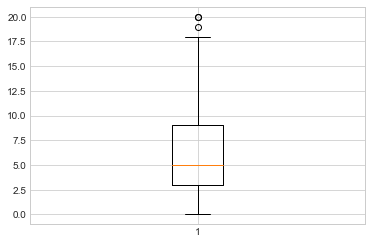

In [33]:
# to see the spread of Idle time to decide whether to go with 'mean' or 'median'
plt.boxplot(IdleTimeCalc['RoundHourIdleTime'])
plt.show()

In [34]:
# Data to compare the Idle time spent by drivers at Airport and City in each time slots
IdleTimeCalc.groupby(['TravelFrom-To','Time-Slots'])['RoundHourIdleTime'].median()

TravelFrom-To    Time-Slots               
Airport to City  Afternoon (11 AM to 5 PM)    5.0
                 Evening (5 PM to 11 PM)      2.0
                 Morning (5 AM to 11 AM)      7.0
                 Night (11PM to 5 AM)         6.0
City to Airport  Afternoon (11 AM to 5 PM)    5.0
                 Evening (5 PM to 11 PM)      2.0
                 Morning (5 AM to 11 AM)      7.0
                 Night (11PM to 5 AM)         6.0
Name: RoundHourIdleTime, dtype: float64

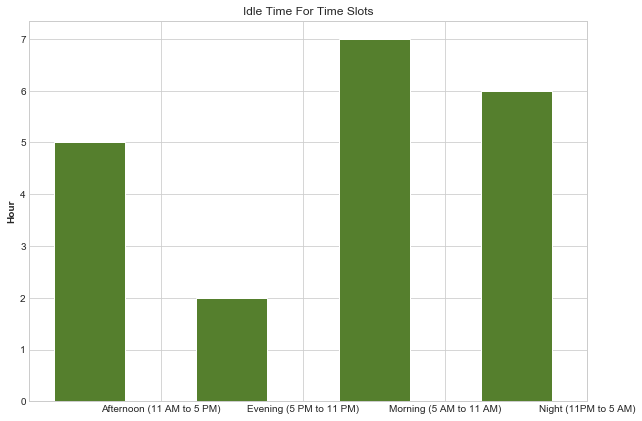

In [35]:
# plot to see the idle time on time slot scale
A = IdleTimeCalc.groupby(['Time-Slots'])['RoundHourIdleTime'].median()
plt.figure(figsize=(10, 7))
barWidth = 0.5
r = np.arange(len(A))
plt.bar(r,A,color='#557f2d', width=barWidth, edgecolor='white')
plt.xticks([r + barWidth for r in range(len(A))], ['Afternoon (11 AM to 5 PM)','Evening (5 PM to 11 PM)','Morning (5 AM to 11 AM)','Night (11PM to 5 AM)'])
plt.ylabel('Hour', fontweight='bold')
plt.title('Idle Time For Time Slots')
plt.show() 

In [36]:
# Taking the difference in request timestamps and drop timestamps to find the total journey time
df1['JourneyTime'] = df1['Drop timestamp']-df1['Request timestamp']

In [37]:
# Converted the Journey time to minutes
df1['RoundJourneyTime'] = round(df1['JourneyTime'].dt.total_seconds()/60)

# Total Journey time on time slots scale
df1.groupby('Time-Slots')['RoundJourneyTime'].median()

Time-Slots
Afternoon (11 AM to 5 PM)    52.0
Evening (5 PM to 11 PM)      52.0
Morning (5 AM to 11 AM)      53.0
Night (11PM to 5 AM)         52.0
Name: RoundJourneyTime, dtype: float64

In [38]:
# Total Journey time on type of request
df1.groupby(['TravelFrom-To','Time-Slots'])['RoundJourneyTime'].median()

TravelFrom-To    Time-Slots               
Airport to City  Afternoon (11 AM to 5 PM)    51.0
                 Evening (5 PM to 11 PM)      52.0
                 Morning (5 AM to 11 AM)      50.0
                 Night (11PM to 5 AM)         52.0
City to Airport  Afternoon (11 AM to 5 PM)    52.0
                 Evening (5 PM to 11 PM)      52.0
                 Morning (5 AM to 11 AM)      55.0
                 Night (11PM to 5 AM)         55.0
Name: RoundJourneyTime, dtype: float64